In [1]:
# Dependencies
import numpy as np
import pandas as pd

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

# Import Matplot and style
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

# Adding a seaborn and scipy for addional query's graphs
import seaborn as sns
from scipy import stats

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [3]:
Base.classes.keys()

['measurement', 'station']

In [4]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [5]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
june_temperature = session.query(Measurement.tobs).filter(extract('month', Measurement.date) == 6).all()
print(june_temperature)

[(78.0,), (76.0,), (78.0,), (76.0,), (77.0,), (78.0,), (77.0,), (78.0,), (78.0,), (79.0,), (78.0,), (78.0,), (78.0,), (77.0,), (78.0,), (78.0,), (77.0,), (77.0,), (82.0,), (78.0,), (78.0,), (78.0,), (78.0,), (78.0,), (77.0,), (76.0,), (78.0,), (78.0,), (78.0,), (78.0,), (77.0,), (78.0,), (73.0,), (70.0,), (76.0,), (77.0,), (77.0,), (77.0,), (77.0,), (78.0,), (77.0,), (77.0,), (78.0,), (78.0,), (77.0,), (78.0,), (78.0,), (75.0,), (76.0,), (76.0,), (77.0,), (78.0,), (76.0,), (77.0,), (75.0,), (77.0,), (76.0,), (76.0,), (75.0,), (77.0,), (77.0,), (76.0,), (78.0,), (77.0,), (76.0,), (77.0,), (76.0,), (76.0,), (77.0,), (77.0,), (78.0,), (77.0,), (77.0,), (77.0,), (76.0,), (75.0,), (76.0,), (76.0,), (77.0,), (76.0,), (73.0,), (73.0,), (75.0,), (77.0,), (76.0,), (77.0,), (79.0,), (78.0,), (79.0,), (78.0,), (78.0,), (79.0,), (77.0,), (77.0,), (77.0,), (77.0,), (77.0,), (78.0,), (77.0,), (76.0,), (78.0,), (78.0,), (77.0,), (78.0,), (78.0,), (73.0,), (76.0,), (77.0,), (75.0,), (76.0,), (74.0,), 

In [6]:
# 3. Convert the June temperatures to a list.
june_temperature = list(np.ravel(june_temperature))
print(june_temperature)

[78.0, 76.0, 78.0, 76.0, 77.0, 78.0, 77.0, 78.0, 78.0, 79.0, 78.0, 78.0, 78.0, 77.0, 78.0, 78.0, 77.0, 77.0, 82.0, 78.0, 78.0, 78.0, 78.0, 78.0, 77.0, 76.0, 78.0, 78.0, 78.0, 78.0, 77.0, 78.0, 73.0, 70.0, 76.0, 77.0, 77.0, 77.0, 77.0, 78.0, 77.0, 77.0, 78.0, 78.0, 77.0, 78.0, 78.0, 75.0, 76.0, 76.0, 77.0, 78.0, 76.0, 77.0, 75.0, 77.0, 76.0, 76.0, 75.0, 77.0, 77.0, 76.0, 78.0, 77.0, 76.0, 77.0, 76.0, 76.0, 77.0, 77.0, 78.0, 77.0, 77.0, 77.0, 76.0, 75.0, 76.0, 76.0, 77.0, 76.0, 73.0, 73.0, 75.0, 77.0, 76.0, 77.0, 79.0, 78.0, 79.0, 78.0, 78.0, 79.0, 77.0, 77.0, 77.0, 77.0, 77.0, 78.0, 77.0, 76.0, 78.0, 78.0, 77.0, 78.0, 78.0, 73.0, 76.0, 77.0, 75.0, 76.0, 74.0, 75.0, 77.0, 76.0, 77.0, 78.0, 79.0, 77.0, 78.0, 79.0, 78.0, 78.0, 78.0, 78.0, 79.0, 79.0, 82.0, 80.0, 79.0, 79.0, 78.0, 78.0, 77.0, 78.0, 78.0, 73.0, 75.0, 75.0, 76.0, 84.0, 79.0, 76.0, 79.0, 79.0, 77.0, 79.0, 78.0, 78.0, 79.0, 77.0, 79.0, 78.0, 78.0, 78.0, 79.0, 77.0, 78.0, 78.0, 78.0, 78.0, 79.0, 79.0, 77.0, 78.0, 78.0, 78.0, 79.

In [7]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
june_temperature_df = pd.DataFrame(june_temperature, columns=['June Temperatures'])
print(june_temperature_df)

      June Temperatures
0                  78.0
1                  76.0
2                  78.0
3                  76.0
4                  77.0
...                 ...
1695               79.0
1696               74.0
1697               74.0
1698               76.0
1699               75.0

[1700 rows x 1 columns]


In [8]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
june_temperature_df.describe()

,June Temperatures
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [9]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.

december_temperature = session.query(Measurement.tobs).filter(extract('month', Measurement.date) == 12).all()
print(december_temperature)

[(76.0,), (74.0,), (74.0,), (64.0,), (64.0,), (67.0,), (77.0,), (66.0,), (69.0,), (68.0,), (68.0,), (71.0,), (74.0,), (67.0,), (66.0,), (69.0,), (71.0,), (70.0,), (70.0,), (74.0,), (74.0,), (71.0,), (75.0,), (75.0,), (72.0,), (69.0,), (68.0,), (73.0,), (74.0,), (73.0,), (73.0,), (73.0,), (73.0,), (71.0,), (73.0,), (73.0,), (77.0,), (72.0,), (71.0,), (73.0,), (70.0,), (73.0,), (69.0,), (74.0,), (72.0,), (71.0,), (72.0,), (72.0,), (70.0,), (73.0,), (73.0,), (72.0,), (73.0,), (73.0,), (72.0,), (63.0,), (65.0,), (71.0,), (76.0,), (70.0,), (76.0,), (69.0,), (69.0,), (69.0,), (74.0,), (76.0,), (74.0,), (73.0,), (73.0,), (74.0,), (73.0,), (73.0,), (73.0,), (74.0,), (74.0,), (71.0,), (73.0,), (72.0,), (64.0,), (66.0,), (73.0,), (72.0,), (65.0,), (64.0,), (69.0,), (68.0,), (77.0,), (71.0,), (71.0,), (69.0,), (68.0,), (68.0,), (69.0,), (70.0,), (72.0,), (76.0,), (75.0,), (69.0,), (71.0,), (71.0,), (71.0,), (68.0,), (65.0,), (70.0,), (69.0,), (69.0,), (71.0,), (67.0,), (73.0,), (74.0,), (73.0,), 

In [10]:
# 7. Convert the December temperatures to a list.
december_temperature = list(np.ravel(december_temperature))
print(december_temperature)

[76.0, 74.0, 74.0, 64.0, 64.0, 67.0, 77.0, 66.0, 69.0, 68.0, 68.0, 71.0, 74.0, 67.0, 66.0, 69.0, 71.0, 70.0, 70.0, 74.0, 74.0, 71.0, 75.0, 75.0, 72.0, 69.0, 68.0, 73.0, 74.0, 73.0, 73.0, 73.0, 73.0, 71.0, 73.0, 73.0, 77.0, 72.0, 71.0, 73.0, 70.0, 73.0, 69.0, 74.0, 72.0, 71.0, 72.0, 72.0, 70.0, 73.0, 73.0, 72.0, 73.0, 73.0, 72.0, 63.0, 65.0, 71.0, 76.0, 70.0, 76.0, 69.0, 69.0, 69.0, 74.0, 76.0, 74.0, 73.0, 73.0, 74.0, 73.0, 73.0, 73.0, 74.0, 74.0, 71.0, 73.0, 72.0, 64.0, 66.0, 73.0, 72.0, 65.0, 64.0, 69.0, 68.0, 77.0, 71.0, 71.0, 69.0, 68.0, 68.0, 69.0, 70.0, 72.0, 76.0, 75.0, 69.0, 71.0, 71.0, 71.0, 68.0, 65.0, 70.0, 69.0, 69.0, 71.0, 67.0, 73.0, 74.0, 73.0, 67.0, 74.0, 75.0, 75.0, 74.0, 67.0, 73.0, 73.0, 71.0, 72.0, 71.0, 68.0, 65.0, 69.0, 70.0, 70.0, 74.0, 71.0, 74.0, 73.0, 72.0, 74.0, 72.0, 74.0, 75.0, 74.0, 70.0, 74.0, 70.0, 66.0, 61.0, 63.0, 63.0, 63.0, 63.0, 67.0, 56.0, 75.0, 77.0, 75.0, 75.0, 75.0, 75.0, 71.0, 70.0, 74.0, 74.0, 75.0, 72.0, 70.0, 66.0, 74.0, 75.0, 74.0, 75.0, 76.

In [11]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
december_temperature_df = pd.DataFrame(december_temperature, columns=['December Temperatures'])
print(december_temperature_df)

      December Temperatures
0                      76.0
1                      74.0
2                      74.0
3                      64.0
4                      64.0
...                     ...
1512                   71.0
1513                   71.0
1514                   69.0
1515                   65.0
1516                   65.0

[1517 rows x 1 columns]


In [12]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
december_temperature_df.describe()

,December Temperatures
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


### Additionals plots (histogram): June Temperatures and December temperatures  

Text(0.5, 1.0, 'June Temperatures')

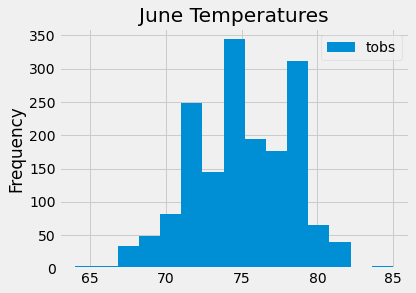

In [13]:
june_temperature_df = pd.DataFrame(june_temperature, columns=['tobs'])
june_temperature_df.plot.hist(bins=15)
plt.tight_layout()
plt.title('June Temperatures')

Text(0.5, 1.0, 'December Temperatures')

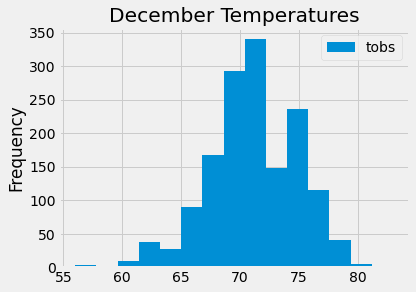

In [14]:
december_temperatures_df = pd.DataFrame(december_temperature, columns=['tobs'])
december_temperatures_df.plot.hist(bins=15)
plt.tight_layout()
plt.title('December Temperatures')

### Additional Queries: June and December Precipitation

In [15]:
# Additional Query 1: June Precipitation 
june_precipitation = session.query(Measurement.prcp).filter(extract('month', Measurement.date) == 6).all()
print(june_precipitation)


[(0.0,), (0.01,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.02,), (0.0,), (0.0,), (0.0,), (0.0,), (0.07,), (0.0,), (0.56,), (0.89,), (0.0,), (0.0,), (0.0,), (0.03,), (0.01,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.05,), (0.06,), (0.07,), (None,), (0.0,), (0.0,), (0.01,), (0.01,), (0.0,), (0.02,), (0.02,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (None,), (None,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.03,), (0.15,), (0.01,), (0.0,), (0.05,), (0.0,), (0.01,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.37,), (0.0,), (0.0,), (0.0,), (0.01,), (0.0,), (0.04,), (0.12,), (0.04,), (0.02,), (0.35,), (0.03,), (0.01,), (0.0,), (0.0,), (0.03,), (0.01,), (0.0,), (0.66,), (0.01,), (0.0,), (0.0

In [16]:
# Convert the June Precipitation to a list.
june_precipitation = list(np.ravel(june_precipitation))
print(june_precipitation)


[0.0, 0.01, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.02, 0.0, 0.0, 0.0, 0.0, 0.07, 0.0, 0.56, 0.89, 0.0, 0.0, 0.0, 0.03, 0.01, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.05, 0.06, 0.07, None, 0.0, 0.0, 0.01, 0.01, 0.0, 0.02, 0.02, 0.0, 0.0, 0.0, 0.0, 0.0, None, None, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.03, 0.15, 0.01, 0.0, 0.05, 0.0, 0.01, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.37, 0.0, 0.0, 0.0, 0.01, 0.0, 0.04, 0.12, 0.04, 0.02, 0.35, 0.03, 0.01, 0.0, 0.0, 0.03, 0.01, 0.0, 0.66, 0.01, 0.0, 0.0, 0.0, 0.03, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.01, 0.0, 0.03, 0.15, 0.01, 0.07, 0.01, 0.01, 0.19, 0.0, 0.05, 0.06, 0.04, 0.0, 0.01, 0.02, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.03, 0.0, 0.01, 0.04, 0.0, 0.0, 0.03, 0.03, 0.03, 0.0, 0.0, 0.0, 0.0, 0.0, 0.06, 0.0, 0.0, 0.0, 0.0, 0.0, 0.01, 0.0, 0.01, 0.05, 0.0, 0.01,

In [17]:
# Create a DataFrame from the list of june precipitations. 
june_precipitation_df = pd.DataFrame(june_precipitation, columns=['June Precipitation'])
print(june_precipitation_df)


      June Precipitation
0                   0.00
1                   0.01
2                   0.00
3                   0.00
4                   0.00
...                  ...
1695                0.02
1696                0.10
1697                0.02
1698                0.04
1699                0.20

[1700 rows x 1 columns]


In [18]:
# Print(june_precipitation_df.describe())
june_precipitation_df.describe()


,June Precipitation
count,1574.000000
mean,0.136360
std,0.335731
min,0.000000
25%,0.000000
50%,0.020000
75%,0.120000
max,4.430000


In [19]:
# Additional Query 2: December Precipitation 
december_precipitation = session.query(Measurement.prcp).filter(extract('month', Measurement.date) == 12).all()
print(december_precipitation)


[(0.04,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (1.58,), (0.77,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (1.4,), (0.0,), (0.0,), (None,), (0.13,), (0.55,), (0.06,), (0.01,), (0.0,), (0.03,), (0.08,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.13,), (0.07,), (0.07,), (0.08,), (0.4,), (0.7,), (0.0,), (0.01,), (0.07,), (0.02,), (0.15,), (0.02,), (0.18,), (0.03,), (0.04,), (0.1,), (0.03,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.01,), (0.0,), (0.0,), (0.0,), (0.2,), (0.01,), (None,), (None,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.14,), (0.09,), (0.01,), (0.02,), (0.02,), (0.12,), (0.0,), (0.1,), (0.0,), (0.0,), (0.0,), (0.0,), (0.03,), (0.0,), (0.0,), (0.0,), (0.0,), (0.04,), (0.0,), (2.01,), (0.01,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.03,), (0.0,), (0.0,), (0.02,), (0.0,), (0.0,), (1.1,), (0.02,), (0.0,), (0.16,), (0.09,), (0.02,), (0.0,), (0.0,), (0.05,), (0.02,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.02,), (

In [20]:
# Convert the December Precipitation to a list.
december_precipitation = list(np.ravel(december_precipitation))
print(december_precipitation)


[0.04, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.58, 0.77, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.4, 0.0, 0.0, None, 0.13, 0.55, 0.06, 0.01, 0.0, 0.03, 0.08, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.13, 0.07, 0.07, 0.08, 0.4, 0.7, 0.0, 0.01, 0.07, 0.02, 0.15, 0.02, 0.18, 0.03, 0.04, 0.1, 0.03, 0.0, 0.0, 0.0, 0.0, 0.0, 0.01, 0.0, 0.0, 0.0, 0.2, 0.01, None, None, 0.0, 0.0, 0.0, 0.0, 0.0, 0.14, 0.09, 0.01, 0.02, 0.02, 0.12, 0.0, 0.1, 0.0, 0.0, 0.0, 0.0, 0.03, 0.0, 0.0, 0.0, 0.0, 0.04, 0.0, 2.01, 0.01, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.03, 0.0, 0.0, 0.02, 0.0, 0.0, 1.1, 0.02, 0.0, 0.16, 0.09, 0.02, 0.0, 0.0, 0.05, 0.02, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.02, 0.15, 0.09, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.05, 0.01, 0.0, 0.03, 0.02, 0.01, 0.01, 0.0, 0.0, 0.0, 0.0, 0.0, 0.93, 0.04, 0.02, 0.0, 0.0, 0.0, 0.0, 0.0, 0.05, 0.0, 0.0, 0.06, 0.02, 0.0, 0.0, 0.0, 0.0, 0.0, 0.06, 0.0, 0.39, 0.0, 0.0, 0.08, 0.0, 0.02, 0.08, 0.13, 0.03, 0.01, 0.0, 0.0, 0.0, 0.0, 0.02, 0.43, 0.01, 0.0, 0.0, 0.0, 0.12, 0.03, 0.0, 0.03, 0.43, 0.02

In [21]:
# Create a DataFrame from the list of december precipitations.
december_precipitation_df = pd.DataFrame(december_precipitation, columns=['December Precipitation'])

In [22]:
# print(december_precipitation_df.describe())
december_precipitation_df.describe()

,December Precipitation
count,1405.000000
mean,0.216819
std,0.541399
min,0.000000
25%,0.000000
50%,0.030000
75%,0.150000
max,6.420000
